<a href="https://colab.research.google.com/github/npraneeth09/my-work-/blob/main/pso_and_ga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/finaldataset.csv')
df.head()

,artist_name,track_name,genre,lyrics,shake the audience,romantic,music,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy
0,mukesh,mohabbat bhi jhoothi,pop,hold time feel break feel untrue convince spea...,0.000598,0.017104,0.039288,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110
1,frankie laine,i believe,pop,believe drop rain fall grow believe darkest ni...,0.001284,0.001284,0.118034,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240
2,johnnie ray,cry,pop,sweetheart send letter goodbye secret feel bet...,0.002770,0.158564,0.323794,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112
3,pérez prado,patricia,pop,kiss lips want stroll charm mambo chacha merin...,0.021500,0.411536,0.001548,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736
4,giorgos papadopoulos,apopse eida oneiro,pop,till darling till matter know till dream live ...,0.001350,0.463430,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375


# **PSO algorithm**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

#Loading Dataset

df = pd.read_csv('/content/finaldataset.csv')
df = df.head(2000)

# Label encoding
label_encoder_artist = LabelEncoder()
df['artist_encoded'] = label_encoder_artist.fit_transform(df['artist_name'])

label_encoder_track_name = LabelEncoder()
df['track_name_encoded'] = label_encoder_track_name.fit_transform(df['track_name'])

label_encoder_genre = LabelEncoder()
df['genre_encoded'] = label_encoder_genre.fit_transform(df['genre'])

label_encoder_danceability = LabelEncoder()
df['danceability_encoded'] = label_encoder_danceability.fit_transform(df['danceability'])

label_encoder_acousticness = LabelEncoder()
df['acousticness_encoded'] = label_encoder_acousticness.fit_transform(df['acousticness'])

label_encoder_energy = LabelEncoder()
df['energy_encoded'] = label_encoder_energy.fit_transform(df['energy'])

# Combine artist_encoded, genre_encoded into a feature matrix
song_features = df[['genre_encoded','artist_encoded','energy_encoded','acousticness_encoded','danceability_encoded']].values



# Define the PSO parameters
num_particles = 20
num_dimensions = song_features.shape[1]
max_iterations = 50
c1 = 1.0  # cognitive parameter
c2 = 1.5  # social parameter
w = 0.5  # inertia weight

# Assuming you have N songs, create an NxN matrix for ground truth
num_songs = len(df)




# Define the fitness function
def fitness_function(weights):
    # Calculate the similarity matrix based on the feature weights
    weighted_features = weights * song_features
    similarity_matrix = np.dot(weighted_features,weighted_features.T)


    target_similarity_matrix = np.random.rand(similarity_matrix.shape[0], similarity_matrix.shape[0])

    fitness = np.mean((similarity_matrix - target_similarity_matrix) ** 2)

    return fitness


# Initialize particles and velocities
particles_position = np.random.rand(num_particles, num_dimensions)
particles_velocity = np.random.rand(num_particles, num_dimensions)

# Initialize personal best positions and fitness values
personal_best_positions = particles_position.copy()
personal_best_fitness = np.zeros(num_particles)

# Initialize global best position and fitness value
global_best_position = np.zeros(num_dimensions)
global_best_fitness = float('inf')


# Run PSO algorithm
for iteration in range(max_iterations):
    for i in range(num_particles):
        # Evaluate fitness
        fitness = fitness_function(particles_position[i])


        # Update personal best
        if fitness < personal_best_fitness[i]:
            personal_best_fitness[i] = fitness
            personal_best_positions[i] = particles_position[i].copy()

        # Update global best
        if fitness < global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particles_position[i].copy()

    for i in range(num_particles):
        # Update velocities and positions
        r1, r2 = np.random.rand(), np.random.rand()
        inertia_term = w * particles_velocity[i]
        cognitive_term = c1 * r1 * (personal_best_positions[i] - particles_position[i])
        social_term = c2 * r2 * (global_best_position - particles_position[i])
        particles_velocity[i] = inertia_term + cognitive_term + social_term
        particles_position[i] = particles_position[i] + particles_velocity[i]


# The optimal weights for computing the similarity matrix are in global_best_position
# Using these weights to compute the final similarity matrix
optimal_weights = global_best_position
final_similarity_matrix = np.dot(optimal_weights * song_features, (optimal_weights * song_features).T)


seed_song_index = 10  # Replace with the actual index of the seed song
num_recommendations = 5
def recommend_song(seed_song_index, similarity_matrix, num_recommendations=5):
    # Getting similarity scores for the seed song
    seed_song_similarity_scores = similarity_matrix[seed_song_index, :]

    # Sort the songs based on similarity scores
    sorted_indices = np.argsort(seed_song_similarity_scores)[::-1]

    # Exclude the seed song itself from recommendations
    recommended_indices = [i for i in sorted_indices if i != seed_song_index]

    # Get the top N recommended songs
    top_recommendations = recommended_indices[:num_recommendations]

    return top_recommendations
# Call the function to get recommended song indices
recommended_indices = recommend_song(seed_song_index, final_similarity_matrix, num_recommendations)

print("Recommended Songs:")
for idx in recommended_indices:
    print(f"Track Name: {df['track_name'].iloc[idx]}, Artist: {df['artist_name'].iloc[idx]}")




Recommended Songs:
Track Name: 你去了那裡, Artist: 張露
Track Name: jack palance, Artist: van dyke parks
Track Name: blue money, Artist: van morrison
Track Name: rene de marie, Artist: triste janero
Track Name: 夢斷巫山, Artist: 張露


## **GA algorithm**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv('/content/finaldataset.csv')
df = df.head(500)

# Label encoding of the dataset
label_encoder_artist = LabelEncoder()
df['artist_encoded'] = label_encoder_artist.fit_transform(df['artist_name'])

label_encoder_track_name = LabelEncoder()
df['track_name_encoded'] = label_encoder_track_name.fit_transform(df['track_name'])

label_encoder_genre = LabelEncoder()
df['genre_encoded'] = label_encoder_genre.fit_transform(df['genre'])

label_encoder_danceability = LabelEncoder()
df['danceability_encoded'] = label_encoder_danceability.fit_transform(df['danceability'])

label_encoder_acousticness = LabelEncoder()
df['acousticness_encoded'] = label_encoder_acousticness.fit_transform(df['acousticness'])

label_encoder_energy = LabelEncoder()
df['energy_encoded'] = label_encoder_energy.fit_transform(df['energy'])

# Combining the selected features into a feature matrix
song_features = df[['genre_encoded', 'artist_encoded', 'energy_encoded', 'acousticness_encoded', 'danceability_encoded']].values

# Genetic Algorithm Parameters
population_size = 10
num_generations = 30
mutation_rate = 0.05

# Fitness function for Genetic Algorithm
def fitness_function(chromosome):
    # Calculating the similarity matrix based on the feature weights
    weighted_features = chromosome * song_features
    similarity_matrix = np.dot(weighted_features, weighted_features.T)

    target_similarity_matrix = np.random.rand(similarity_matrix.shape[0], similarity_matrix.shape[0])

    fitness = np.mean((similarity_matrix - target_similarity_matrix) ** 2)

    return fitness

# Initialization of the population
population = np.random.rand(population_size, song_features.shape[1])

# Genetic Algorithm
for generation in range(num_generations):
    # Evaluate fitness for each individual in the population
    fitness_values = np.array([fitness_function(chromosome) for chromosome in population])

    # Selecting individuals for reproduction (Tournament Selection)
    selected_indices = np.random.choice(population_size, size=population_size, replace=True)
    selected_population = population[selected_indices]

    # Crossover (Two-Point Crossover)
    crossover_indices = np.random.choice(song_features.shape[1], size=2)
    crossover_mask = np.zeros_like(selected_population)
    crossover_mask[:, crossover_indices[0]:crossover_indices[1]] = 1
    offspring_population = selected_population.copy()
    offspring_population[1::2] = np.where(crossover_mask[1::2], selected_population[1::2], selected_population[::2])

    # Mutation
    mutation_mask = (np.random.rand(population_size, song_features.shape[1]) < mutation_rate).astype(float)
    mutated_population = offspring_population + mutation_mask * np.random.rand(population_size, song_features.shape[1])

    # Replacement (Replace the old population with new individuals)
    population = mutated_population

# After the algorithm converges, we use the best individual to get recommendations
best_individual = population[np.argmin(fitness_values)]
final_similarity_matrix = np.dot(best_individual * song_features, (best_individual * song_features).T)

# Example: We are taking the  seed_song_index as the index of the seed song
seed_song_index = 10  # we replace with the actual index of the seed song
num_recommendations = 5

# recommend songs using the final similarity matrix
def recommend_song(seed_song_index, similarity_matrix, num_recommendations=5):
    seed_song_similarity_scores = similarity_matrix[seed_song_index, :]
    sorted_indices = np.argsort(seed_song_similarity_scores)[::-1]
    recommended_indices = [i for i in sorted_indices if i != seed_song_index]
    top_recommendations = recommended_indices[:num_recommendations]
    return top_recommendations

# Calling the function to get recommended song indices
recommended_indices = recommend_song(seed_song_index, final_similarity_matrix, num_recommendations)

# Print or use the recommended songs' information
print("Recommended Songs:")
for idx in recommended_indices:
    print(f"Track Name: {df['track_name'].iloc[idx]}, Artist: {df['artist_name'].iloc[idx]}")


Recommended Songs:
Track Name: gullyachi shapath, Artist: asha bhosle
Track Name: antar mantar jantar, Artist: lata mangeshkar
Track Name: finito la mouzika, Artist: stélios kazantzídis
Track Name: suno sunaoon tumhen ek kahani, Artist: pradeep kumar
Track Name: blue skies, Artist: les paul


# **PSO Algorithm- finding out the best parameters and also providing the convergence plot**

Best Parameters:
c1: 1.0
c2: 1.5
w: 0.5
num_particles: 20


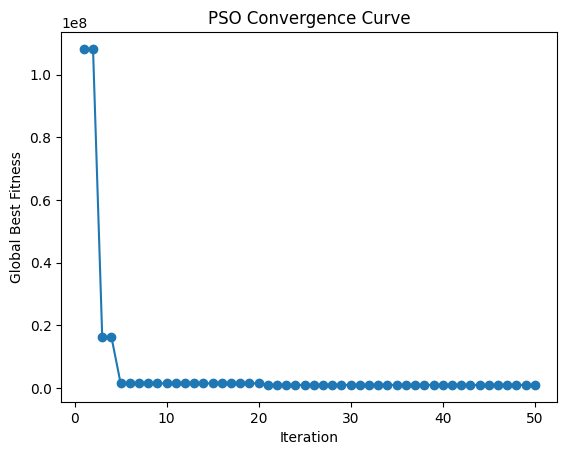

Final Fitness Value: 2.8598303557579348
Recommended Songs:
Track Name: for me and my gal, Artist: the chordettes
Track Name: viljen i veta (would you like to know?), Artist: sven-bertil taube
Track Name: ansoo to nahin hai ankhon men, Artist: talat mahmood
Track Name: mohabbat bhi jhoothi, Artist: mukesh
Track Name: judai ki khabar hoti agar, Artist: lata mangeshkar


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools


df = pd.read_csv('/content/finaldataset.csv')
df = df.head(500)

def fitness_function(weights):

    weighted_features = weights * song_features
    similarity_matrix = np.dot(weighted_features, weighted_features.T)

    target_similarity_matrix = np.random.rand(similarity_matrix.shape[0], similarity_matrix.shape[0])

    fitness = np.mean((similarity_matrix - target_similarity_matrix) ** 2)

    return fitness

label_encoder_artist = LabelEncoder()
df['artist_encoded'] = label_encoder_artist.fit_transform(df['artist_name'])

label_encoder_track_name = LabelEncoder()
df['track_name_encoded'] = label_encoder_track_name.fit_transform(df['track_name'])

label_encoder_genre = LabelEncoder()
df['genre_encoded'] = label_encoder_genre.fit_transform(df['genre'])

label_encoder_danceability = LabelEncoder()
df['danceability_encoded'] = label_encoder_danceability.fit_transform(df['danceability'])

label_encoder_acousticness = LabelEncoder()
df['acousticness_encoded'] = label_encoder_acousticness.fit_transform(df['acousticness'])

label_encoder_energy = LabelEncoder()
df['energy_encoded'] = label_encoder_energy.fit_transform(df['energy'])


song_features = df[['genre_encoded', 'artist_encoded', 'energy_encoded', 'acousticness_encoded', 'danceability_encoded']].values


max_iterations = 50


train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


param_ranges = {
    'c1': [1.0, 1.5, 2.0, 2.5],
    'c2': [1.0, 1.5, 2.0, 2.5],
    'w': [0.5, 0.6, 0.7, 0.8, 0.9],
    'num_particles': [5, 10, 15, 20]
}

best_params = None
best_fitness = float('inf')

# Grid Search
for params in itertools.product(*param_ranges.values()):
    c1, c2, w, num_particles = params

    # Initialize particles and velocities
    particles_position = np.random.rand(num_particles, song_features.shape[1])
    particles_velocity = np.random.rand(num_particles, song_features.shape[1])

    # Initialize personal best positions and fitness values
    personal_best_positions = particles_position.copy()
    personal_best_fitness = np.zeros(num_particles)

    # Initialize global best position and fitness value
    global_best_position = np.zeros(song_features.shape[1])
    global_best_fitness = float('inf')

    pso_fitness_values = []

    # Run PSO algorithm
    for iteration in range(max_iterations):
        for i in range(num_particles):
            fitness = fitness_function(particles_position[i])

            # Update personal best
            if fitness < personal_best_fitness[i]:
                personal_best_fitness[i] = fitness
                personal_best_positions[i] = particles_position[i].copy()

            # Update global best
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particles_position[i].copy()

        pso_fitness_values.append(global_best_fitness)

        for i in range(num_particles):
            # Update velocities and positions
            r1, r2 = np.random.rand(), np.random.rand()
            inertia_term = w * particles_velocity[i]
            cognitive_term = c1 * r1 * (personal_best_positions[i] - particles_position[i])
            social_term = c2 * r2 * (global_best_position - particles_position[i])
            particles_velocity[i] = inertia_term + cognitive_term + social_term
            particles_position[i] = particles_position[i] + particles_velocity[i]

    # Evaluate fitness on validation set
    val_fitness = fitness_function(global_best_position)

    # Update best parameters if current configuration is better
    if val_fitness < best_fitness:
        best_fitness = val_fitness
        best_params = params

# Print the best parameters
print("Best Parameters:")
print("c1:", best_params[0])
print("c2:", best_params[1])
print("w:", best_params[2])
print("num_particles:", best_params[3])

# Plot Convergence Curve
plt.plot(range(1, max_iterations + 1), pso_fitness_values, marker='o')
plt.title('PSO Convergence Curve')
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.show()

# Print final fitness value
print("Final Fitness Value:", best_fitness)




optimal_weights = global_best_position
final_similarity_matrix = np.dot(optimal_weights * song_features, (optimal_weights * song_features).T)


seed_song_index = 10
num_recommendations = 5



def recommend_song(seed_song_index, similarity_matrix, num_recommendations=5):

    seed_song_similarity_scores = similarity_matrix[seed_song_index, :]


    sorted_indices = np.argsort(seed_song_similarity_scores)[::-1]


    recommended_indices = [i for i in sorted_indices if i != seed_song_index]


    top_recommendations = recommended_indices[:num_recommendations]

    return top_recommendations


recommended_indices = recommend_song(seed_song_index, final_similarity_matrix, num_recommendations)

print("Recommended Songs:")
for idx in recommended_indices:
    print(f"Track Name: {df['track_name'].iloc[idx]}, Artist: {df['artist_name'].iloc[idx]}")

# **GA Algorithm for calculating the best parameters and plots for mutation rate population with fitness**

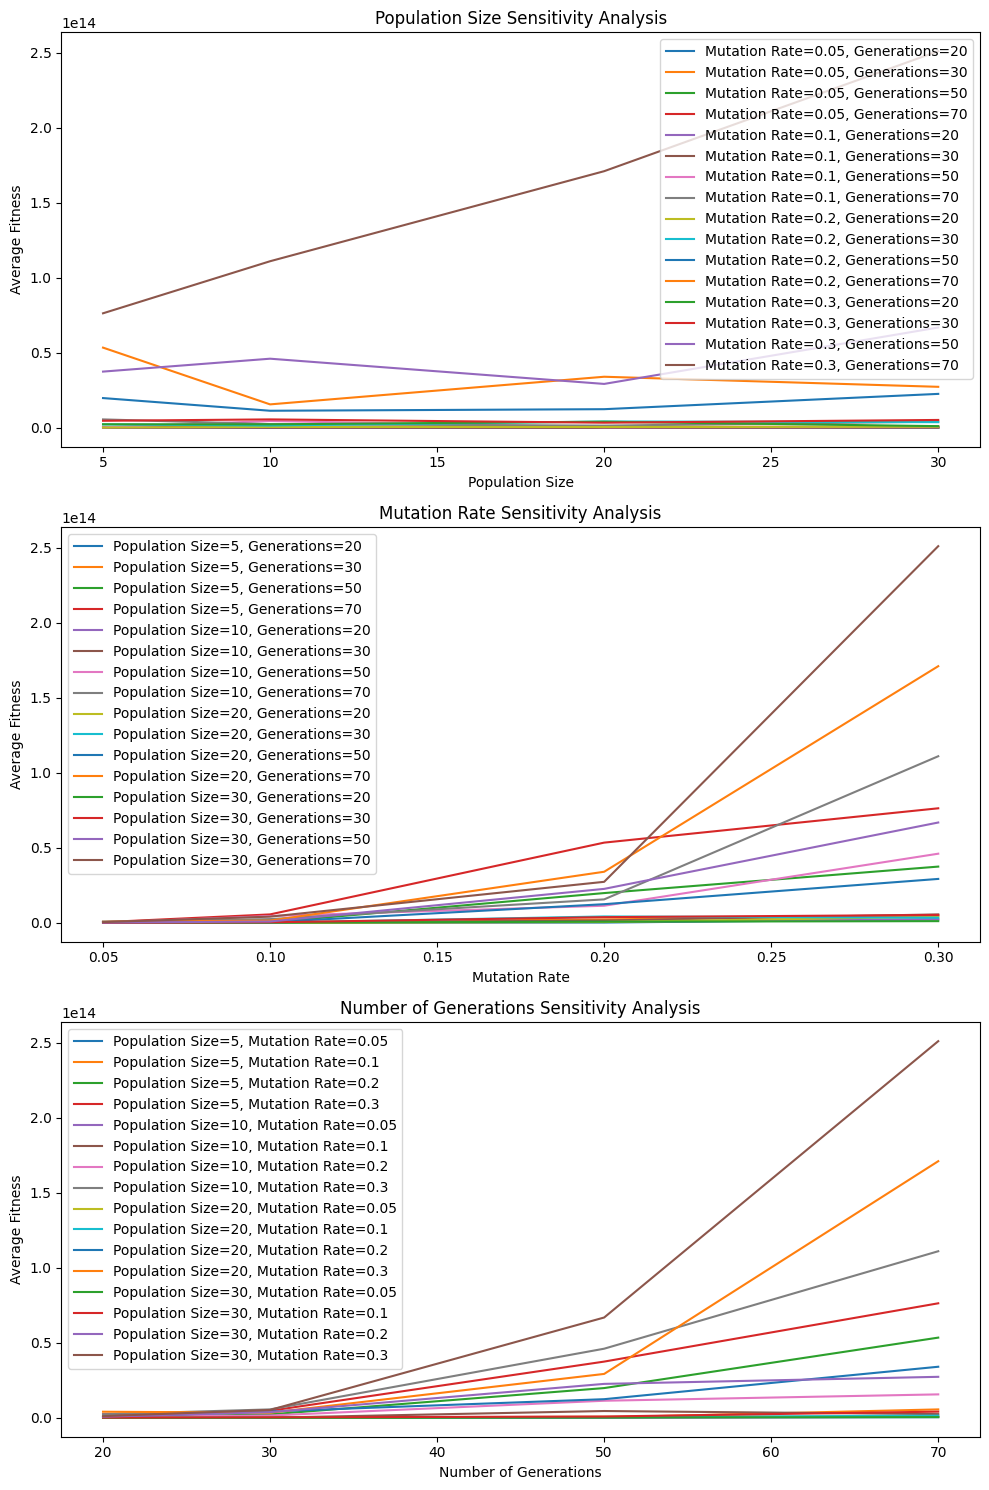

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('/content/finaldataset.csv')
df = df.head(500)


label_encoder_artist = LabelEncoder()
df['artist_encoded'] = label_encoder_artist.fit_transform(df['artist_name'])

label_encoder_track_name = LabelEncoder()
df['track_name_encoded'] = label_encoder_track_name.fit_transform(df['track_name'])

label_encoder_genre = LabelEncoder()
df['genre_encoded'] = label_encoder_genre.fit_transform(df['genre'])

label_encoder_danceability = LabelEncoder()
df['danceability_encoded'] = label_encoder_danceability.fit_transform(df['danceability'])

label_encoder_acousticness = LabelEncoder()
df['acousticness_encoded'] = label_encoder_acousticness.fit_transform(df['acousticness'])

label_encoder_energy = LabelEncoder()
df['energy_encoded'] = label_encoder_energy.fit_transform(df['energy'])


song_features = df[['genre_encoded', 'artist_encoded', 'energy_encoded', 'acousticness_encoded', 'danceability_encoded']].values


population_sizes = [5, 10, 20, 30]
num_generations_list = [20, 30, 50, 70]
mutation_rates = [0.05, 0.1, 0.2, 0.3]

# Lists to store results for plotting
average_fitness_values = []

# Fitness function for Genetic Algorithm
def fitness_function(chromosome):
    # Calculate the similarity matrix based on the feature weights
    weighted_features = chromosome * song_features
    similarity_matrix = np.dot(weighted_features, weighted_features.T)

    target_similarity_matrix = np.random.rand(similarity_matrix.shape[0], similarity_matrix.shape[0])

    fitness = np.mean((similarity_matrix - target_similarity_matrix) ** 2)

    return fitness

# Perform sensitivity analysis
for population_size in population_sizes:
    for mutation_rate in mutation_rates:
        for num_generations in num_generations_list:
            # Initialization of the population
            population = np.random.rand(population_size, song_features.shape[1])

            # Main loop for Genetic Algorithm
            for generation in range(num_generations):
                # Evaluate fitness for each individual in the population
                fitness_values = np.array([fitness_function(chromosome) for chromosome in population])

                # Select individuals for reproduction (Tournament Selection)
                selected_indices = np.random.choice(population_size, size=population_size, replace=True)
                selected_population = population[selected_indices]

                # Crossover (Two-Point Crossover)
                crossover_indices = np.random.choice(song_features.shape[1], size=(population_size // 2, 2))
                crossover_mask = np.zeros_like(selected_population, dtype=bool)

                for i in range(population_size // 2):
                    start, end = sorted(crossover_indices[i])
                    crossover_mask[2*i:2*i+2, start:end] = True

                offspring_population = selected_population.copy()
                offspring_population[crossover_mask] = np.where(crossover_mask, selected_population[::-1], selected_population)[crossover_mask]


                # Mutation
                mutation_mask = (np.random.rand(population_size, song_features.shape[1]) < mutation_rate).astype(float)
                mutated_population = offspring_population + mutation_mask * np.random.rand(population_size, song_features.shape[1])

                # Replacement (Replace the old population with new individuals)
                population = mutated_population

            # After the algorithm converges, calculate average fitness value
            average_fitness = np.mean(fitness_values)
            average_fitness_values.append((population_size, mutation_rate, num_generations, average_fitness))

# Plot the results
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot average fitness values for different population sizes
for mutation_rate in mutation_rates:
    for num_generations in num_generations_list:
        data = [avg_fit[3] for avg_fit in average_fitness_values if avg_fit[1] == mutation_rate and avg_fit[2] == num_generations]
        ax[0].plot(population_sizes, data, label=f'Mutation Rate={mutation_rate}, Generations={num_generations}')

ax[0].set_title('Population Size Sensitivity Analysis')
ax[0].set_xlabel('Population Size')
ax[0].set_ylabel('Average Fitness')
ax[0].legend()

# Plot average fitness values for different mutation rates
for population_size in population_sizes:
    for num_generations in num_generations_list:
        data = [avg_fit[3] for avg_fit in average_fitness_values if avg_fit[0] == population_size and avg_fit[2] == num_generations]
        ax[1].plot(mutation_rates, data, label=f'Population Size={population_size}, Generations={num_generations}')

ax[1].set_title('Mutation Rate Sensitivity Analysis')
ax[1].set_xlabel('Mutation Rate')
ax[1].set_ylabel('Average Fitness')
ax[1].legend()

# Plot average fitness values for different numbers of generations
for population_size in population_sizes:
    for mutation_rate in mutation_rates:
        data = [avg_fit[3] for avg_fit in average_fitness_values if avg_fit[0] == population_size and avg_fit[1] == mutation_rate]
        ax[2].plot(num_generations_list, data, label=f'Population Size={population_size}, Mutation Rate={mutation_rate}')

ax[2].set_title('Number of Generations Sensitivity Analysis')
ax[2].set_xlabel('Number of Generations')
ax[2].set_ylabel('Average Fitness')
ax[2].legend()

plt.tight_layout()
plt.show()


 **BEST PARAMETERS**

In [ ]:
# Find the best parameters
best_params = min(average_fitness_values, key=lambda x: x[3])

# Print the best parameters
print("Best Parameters:")
print(f"Population Size: {best_params[0]}")
print(f"Mutation Rate: {best_params[1]}")
print(f"Number of Generations: {best_params[2]}")
print(f"Average Fitness: {best_params[3]}")


Best Parameters:
Population Size: 10
Mutation Rate: 0.05
Number of Generations: 30
Average Fitness: 5978514363.827158


# **Comparison between PSO and GA using fitness comparison plots**

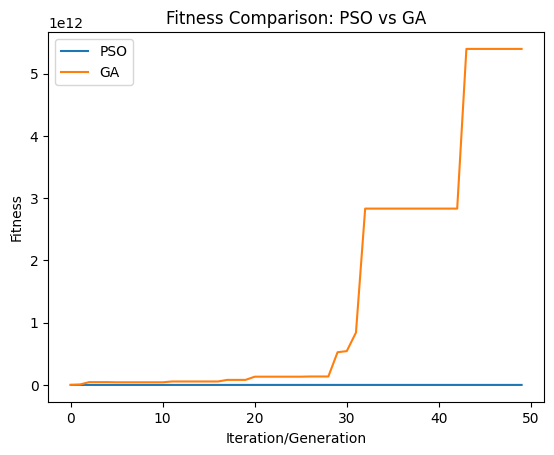

Recommended Songs (PSO):
Track Name: 你去了那裡, Artist: 張露
Track Name: blue money, Artist: van morrison
Track Name: rene de marie, Artist: triste janero
Track Name: chora tua tristeza, Artist: vince guaraldi
Track Name: rain, Artist: walter wanderley

Recommended Songs (GA):
Track Name: antar mantar jantar, Artist: lata mangeshkar
Track Name: going home to mary lou, Artist: neil sedaka
Track Name: gullyachi shapath, Artist: asha bhosle
Track Name: finito la mouzika, Artist: stélios kazantzídis
Track Name: round and round (with mitchell ayres and his orchestra & the ray charles singers), Artist: perry como


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/finaldataset.csv')
df = df.head(1500)

# Label encoding
label_encoder_artist = LabelEncoder()
df['artist_encoded'] = label_encoder_artist.fit_transform(df['artist_name'])

label_encoder_track_name = LabelEncoder()
df['track_name_encoded'] = label_encoder_track_name.fit_transform(df['track_name'])

label_encoder_genre = LabelEncoder()
df['genre_encoded'] = label_encoder_genre.fit_transform(df['genre'])

label_encoder_danceability = LabelEncoder()
df['danceability_encoded'] = label_encoder_danceability.fit_transform(df['danceability'])

label_encoder_acousticness = LabelEncoder()
df['acousticness_encoded'] = label_encoder_acousticness.fit_transform(df['acousticness'])

label_encoder_energy = LabelEncoder()
df['energy_encoded'] = label_encoder_energy.fit_transform(df['energy'])

#  feature matrix
song_features = df[['genre_encoded','artist_encoded','energy_encoded','acousticness_encoded','danceability_encoded']].values

# PSO Parameters
num_particles = 20
num_dimensions = song_features.shape[1]
max_iterations = 50
c1 = 1.0  # cognitive parameter
c2 = 1.5  # social parameter
w = 0.5  # inertia weight

# Genetic Algorithm Parameters
population_size = 10
num_generations = 50
mutation_rate = 0.05

# Define the fitness function for PSO
def pso_fitness_function(weights):
    weighted_features = weights * song_features
    similarity_matrix = np.dot(weighted_features, weighted_features.T)
    target_similarity_matrix = np.random.rand(similarity_matrix.shape[0], similarity_matrix.shape[0])
    fitness = np.mean((similarity_matrix - target_similarity_matrix) ** 2)
    return fitness

# Define the fitness function for GA
def ga_fitness_function(chromosome):
    weighted_features = chromosome * song_features
    similarity_matrix = np.dot(weighted_features, weighted_features.T)
    target_similarity_matrix = np.random.rand(similarity_matrix.shape[0], similarity_matrix.shape[0])
    fitness = np.mean((similarity_matrix - target_similarity_matrix) ** 2)
    return fitness

# PSO Initialization
particles_position = np.random.rand(num_particles, num_dimensions)
particles_velocity = np.random.rand(num_particles, num_dimensions)
personal_best_positions = particles_position.copy()
personal_best_fitness = np.zeros(num_particles)
global_best_position = np.zeros(num_dimensions)
global_best_fitness = float('inf')

# GA Initialization
ga_population = np.random.rand(population_size, song_features.shape[1])

# Run PSO and GA
pso_fitness_history = []
ga_fitness_history = []

for iteration in range(max_iterations):
    # PSO
    for i in range(num_particles):
        fitness = pso_fitness_function(particles_position[i])
        if fitness < personal_best_fitness[i]:
            personal_best_fitness[i] = fitness
            personal_best_positions[i] = particles_position[i].copy()
        if fitness < global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particles_position[i].copy()

    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        inertia_term = w * particles_velocity[i]
        cognitive_term = c1 * r1 * (personal_best_positions[i] - particles_position[i])
        social_term = c2 * r2 * (global_best_position - particles_position[i])
        particles_velocity[i] = inertia_term + cognitive_term + social_term
        particles_position[i] = particles_position[i] + particles_velocity[i]

    pso_fitness_history.append(global_best_fitness)

    # GA
    fitness_values = np.array([ga_fitness_function(chromosome) for chromosome in ga_population])
    selected_indices = np.random.choice(population_size, size=population_size, replace=True)
    selected_population = ga_population[selected_indices]
    crossover_indices = np.random.choice(song_features.shape[1], size=2)
    crossover_mask = np.zeros_like(selected_population)
    crossover_mask[:, crossover_indices[0]:crossover_indices[1]] = 1
    offspring_population = selected_population.copy()
    offspring_population[1::2] = np.where(crossover_mask[1::2], selected_population[1::2], selected_population[::2])
    mutation_mask = (np.random.rand(population_size, song_features.shape[1]) < mutation_rate).astype(float)
    mutated_population = offspring_population + mutation_mask * np.random.rand(population_size, song_features.shape[1])
    ga_population = mutated_population

    ga_fitness_history.append(np.min(fitness_values))

# Get the optimal weights from PSO
optimal_weights_pso = global_best_position
final_similarity_matrix_pso = np.dot(optimal_weights_pso * song_features, (optimal_weights_pso * song_features).T)

# Get the best individual from GA
best_individual_ga = ga_population[np.argmin(fitness_values)]
final_similarity_matrix_ga = np.dot(best_individual_ga * song_features, (best_individual_ga * song_features).T)

# Example: Assuming seed_song_index is the index of the seed song
seed_song_index = 10
num_recommendations = 5

# Function to recommend songs using the final similarity matrix
def recommend_song(seed_song_index, similarity_matrix, num_recommendations=5):
    seed_song_similarity_scores = similarity_matrix[seed_song_index, :]
    sorted_indices = np.argsort(seed_song_similarity_scores)[::-1]
    recommended_indices = [i for i in sorted_indices if i != seed_song_index]
    top_recommendations = recommended_indices[:num_recommendations]
    return top_recommendations

# Call the function to get recommended song indices for PSO
recommended_indices_pso = recommend_song(seed_song_index, final_similarity_matrix_pso, num_recommendations)

# Call the function to get recommended song indices for GA
recommended_indices_ga = recommend_song(seed_song_index, final_similarity_matrix_ga, num_recommendations)

# Plot the fitness history for comparison
plt.plot(range(max_iterations), pso_fitness_history, label='PSO')
plt.plot(range(num_generations), ga_fitness_history, label='GA')
plt.xlabel('Iteration/Generation')
plt.ylabel('Fitness')
plt.legend()
plt.title('Fitness Comparison: PSO vs GA')
plt.show()

# Print or use the recommended songs' information for PSO
print("Recommended Songs (PSO):")
for idx in recommended_indices_pso:
    print(f"Track Name: {df['track_name'].iloc[idx]}, Artist: {df['artist_name'].iloc[idx]}")

# Print or use the recommended songs' information for GA
print("\nRecommended Songs (GA):")
for idx in recommended_indices_ga:
    print(f"Track Name: {df['track_name'].iloc[idx]}, Artist: {df['artist_name'].iloc[idx]}")


# **Comparision between PSO and GA with convergence and Diversity plots**

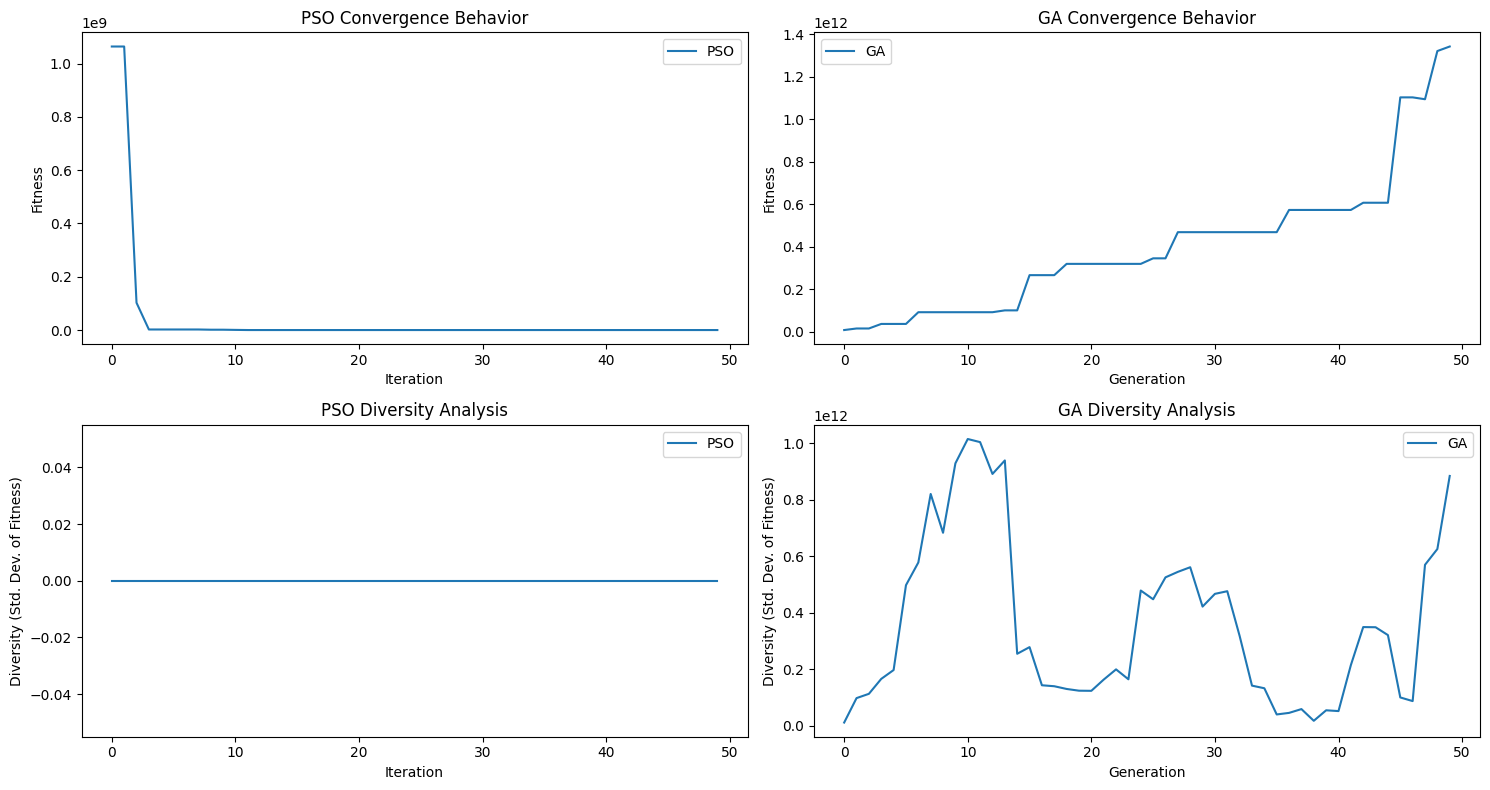

Recommended Songs (PSO):
Track Name: going home to mary lou, Artist: neil sedaka
Track Name: santa claus is coming to town, Artist: the crystals
Track Name: paddiwack song, Artist: ritchie valens
Track Name: antar mantar jantar, Artist: lata mangeshkar
Track Name: rockin' all night, Artist: ritchie valens

Recommended Songs (GA):
Track Name: don't leave me, Artist: ricky nelson
Track Name: our car club, Artist: the beach boys
Track Name: rocking blues, Artist: chris montez
Track Name: antar mantar jantar, Artist: lata mangeshkar
Track Name: breaking up is hard to do, Artist: neil sedaka


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/finaldataset.csv')
df = df.head(1500)

# Label encoding for artist and genre
label_encoder_artist = LabelEncoder()
df['artist_encoded'] = label_encoder_artist.fit_transform(df['artist_name'])

label_encoder_track_name = LabelEncoder()
df['track_name_encoded'] = label_encoder_track_name.fit_transform(df['track_name'])

label_encoder_genre = LabelEncoder()
df['genre_encoded'] = label_encoder_genre.fit_transform(df['genre'])

label_encoder_danceability = LabelEncoder()
df['danceability_encoded'] = label_encoder_danceability.fit_transform(df['danceability'])

label_encoder_acousticness = LabelEncoder()
df['acousticness_encoded'] = label_encoder_acousticness.fit_transform(df['acousticness'])

label_encoder_energy = LabelEncoder()
df['energy_encoded'] = label_encoder_energy.fit_transform(df['energy'])

#feature matrix
song_features = df[['genre_encoded','artist_encoded','energy_encoded','acousticness_encoded','danceability_encoded']].values

# PSO Parameters
num_particles = 20
num_dimensions = song_features.shape[1]
max_iterations = 50
c1 = 1.0  # cognitive parameter
c2 = 1.5  # social parameter
w = 0.5  # inertia weight

# Genetic Algorithm Parameters
population_size = 10
num_generations = 50
mutation_rate = 0.05

# Define the fitness function for PSO
def pso_fitness_function(weights):
    weighted_features = weights * song_features
    similarity_matrix = np.dot(weighted_features, weighted_features.T)
    target_similarity_matrix = np.random.rand(similarity_matrix.shape[0], similarity_matrix.shape[0])
    fitness = np.mean((similarity_matrix - target_similarity_matrix) ** 2)
    return fitness

# Define the fitness function for GA
def ga_fitness_function(chromosome):
    weighted_features = chromosome * song_features
    similarity_matrix = np.dot(weighted_features, weighted_features.T)
    target_similarity_matrix = np.random.rand(similarity_matrix.shape[0], similarity_matrix.shape[0])
    fitness = np.mean((similarity_matrix - target_similarity_matrix) ** 2)
    return fitness

# PSO Initialization
particles_position = np.random.rand(num_particles, num_dimensions)
particles_velocity = np.random.rand(num_particles, num_dimensions)
personal_best_positions = particles_position.copy()
personal_best_fitness = np.zeros(num_particles)
global_best_position = np.zeros(num_dimensions)
global_best_fitness = float('inf')

# GA Initialization
ga_population = np.random.rand(population_size, song_features.shape[1])

# Run PSO and GA
pso_fitness_history = []
ga_fitness_history = []

# Additional list to store diversity information
pso_diversity_history = []
ga_diversity_history = []

for iteration in range(max_iterations):
    # PSO
    for i in range(num_particles):
        fitness = pso_fitness_function(particles_position[i])
        if fitness < personal_best_fitness[i]:
            personal_best_fitness[i] = fitness
            personal_best_positions[i] = particles_position[i].copy()
        if fitness < global_best_fitness:
            global_best_fitness = fitness
            global_best_position = particles_position[i].copy()

    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        inertia_term = w * particles_velocity[i]
        cognitive_term = c1 * r1 * (personal_best_positions[i] - particles_position[i])
        social_term = c2 * r2 * (global_best_position - particles_position[i])
        particles_velocity[i] = inertia_term + cognitive_term + social_term
        particles_position[i] = particles_position[i] + particles_velocity[i]

    pso_fitness_history.append(global_best_fitness)

    # Calculate diversity for PSO (standard deviation of fitness values)
    pso_diversity_history.append(np.std(personal_best_fitness))

    # GA
    fitness_values = np.array([ga_fitness_function(chromosome) for chromosome in ga_population])
    selected_indices = np.random.choice(population_size, size=population_size, replace=True)
    selected_population = ga_population[selected_indices]
    crossover_indices = np.random.choice(song_features.shape[1], size=2)
    crossover_mask = np.zeros_like(selected_population)
    crossover_mask[:, crossover_indices[0]:crossover_indices[1]] = 1
    offspring_population = selected_population.copy()
    offspring_population[1::2] = np.where(crossover_mask[1::2], selected_population[1::2], selected_population[::2])
    mutation_mask = (np.random.rand(population_size, song_features.shape[1]) < mutation_rate).astype(float)
    mutated_population = offspring_population + mutation_mask * np.random.rand(population_size, song_features.shape[1])
    ga_population = mutated_population

    ga_fitness_history.append(np.min(fitness_values))

    # Calculate diversity for GA (standard deviation of fitness values)
    ga_diversity_history.append(np.std(fitness_values))

# Get the optimal weights from PSO
optimal_weights_pso = global_best_position
final_similarity_matrix_pso = np.dot(optimal_weights_pso * song_features, (optimal_weights_pso * song_features).T)

# Get the best individual from GA
best_individual_ga = ga_population[np.argmin(fitness_values)]
final_similarity_matrix_ga = np.dot(best_individual_ga * song_features, (best_individual_ga * song_features).T)

# Example: Assuming seed_song_index is the index of the seed song
seed_song_index = 10
num_recommendations = 5

# Function to recommend songs using the final similarity matrix
def recommend_song(seed_song_index, similarity_matrix, num_recommendations=5):
    seed_song_similarity_scores = similarity_matrix[seed_song_index, :]
    sorted_indices = np.argsort(seed_song_similarity_scores)[::-1]
    recommended_indices = [i for i in sorted_indices if i != seed_song_index]
    top_recommendations = recommended_indices[:num_recommendations]
    return top_recommendations

# Call the function to get recommended song indices for PSO
recommended_indices_pso = recommend_song(seed_song_index, final_similarity_matrix_pso, num_recommendations)

# Call the function to get recommended song indices for GA
recommended_indices_ga = recommend_song(seed_song_index, final_similarity_matrix_ga, num_recommendations)

# Plot the fitness and diversity history for comparison
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(range(max_iterations), pso_fitness_history, label='PSO')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('PSO Convergence Behavior')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(max_iterations), ga_fitness_history, label='GA')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('GA Convergence Behavior')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(max_iterations), pso_diversity_history, label='PSO')
plt.xlabel('Iteration')
plt.ylabel('Diversity (Std. Dev. of Fitness)')
plt.title('PSO Diversity Analysis')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(max_iterations), ga_diversity_history, label='GA')
plt.xlabel('Generation')
plt.ylabel('Diversity (Std. Dev. of Fitness)')
plt.title('GA Diversity Analysis')
plt.legend()

plt.tight_layout()
plt.show()

# Print or use the recommended songs' information for PSO
print("Recommended Songs (PSO):")
for idx in recommended_indices_pso:
    print(f"Track Name: {df['track_name'].iloc[idx]}, Artist: {df['artist_name'].iloc[idx]}")

# Print or use the recommended songs' information for GA
print("\nRecommended Songs (GA):")
for idx in recommended_indices_ga:
    print(f"Track Name: {df['track_name'].iloc[idx]}, Artist: {df['artist_name'].iloc[idx]}")
